In [2]:
import pandas as pd
import chardet

import pandas as pd
df = pd.read_csv('C:/Users/Admin/TNTT/spam4.csv')
if 'v1' in df.columns:
    df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
    print(df.sample(50)) 
else:
    print("Cột 'label' không tồn tại trong dữ liệu.")   


        v1                                                 v2  label_num
1663   ham   Bạn đang làm gì ở Langport? Xin lỗi, nhưng có...        0.0
2358   ham  HELLOGORGEOUS, BẠN THẾ NÀO? ĐIỆN THOẠI CỦA TÔI...        0.0
2703   ham                                  Bất cứ lúc nào...        0.0
3397   ham                     Điều đó thực sự đáng tôn trọng        0.0
1728   ham  Aldrine, rakhesh ex RTM ở đây. Vui lòng gọi. C...        0.0
1679  spam  Số khuyến mại: 8714714 - UR được tặng Kỳ nghỉ ...        1.0
2404   ham                                 Vừa mới trở về nhà        0.0
1319   ham                 Tôi đang lạnh cóng và thèm đá. Fml        0.0
1001   ham          Id chỉ quan trọng khi lên từ ngoài trường        0.0
3396   ham  Như thể tôi muốn giảm giá cho nhân viên hải qu...        0.0
2057   ham  Ha ha nan yalrigu heltini..Iyo kothi chikku, b...        0.0
292    ham         Nhắc tôi cách đến đó và tôi sẽ làm như vậy        0.0
1672   ham                 Vâng. Cảm ơn vì bạn quá 

In [4]:
df.groupby('v1').describe()

label_num                                   
         count mean  std  min  25%  50%  75%  max
v1                                               
ham     3104.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     467.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [5]:
df_spam = df[df['v1'] == 'spam']
df_spam.shape

(467, 3)

In [6]:
df_ham = df[df['v1'] == 'ham']
df_ham.shape

(3104, 3)

In [7]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(467, 3)

In [8]:
import pandas as pd
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(934, 3)

In [9]:
import pandas as pd
import numpy as np
import re
from pyvi import ViTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
with open('vietnamesestopwords.txt','r',encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

In [13]:
tudonspam = Counter()
tudonham = Counter()
tughepspam = Counter()
tughepham = Counter()

def preprocess_and_tokenize(text, update_vocab=False, label=None):

    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.strip()
    tokens = ViTokenizer.tokenize(text).split()
    tokens = [word for word in tokens if word not in stopwords]

    if update_vocab and label is not None:
        for token in tokens:
            if '_' in token:  # Từ ghép
                if label == 1:
                    tughepspam[token] += 1
                else:
                    if token not in tughepspam:
                        tughepham[token] += 1
            else:  # Từ đơn
                if label == 1:
                    tudonspam[token] += 1
                else:
                    if token not in tudonspam:
                        tudonham[token] += 1
                
    return ' '.join(tokens)

data = pd.read_csv('spam4.csv')
data['v1'] = data['v1'].map({'spam': 1, 'ham': 0}) 
#data['tokens'] = data.apply(lambda row: preprocess_and_tokenize(row['v2'], label=row['v1'], update_vocab=True), axis=1)
data['tokens'] = data.apply(lambda row: preprocess_and_tokenize(row['v2'], update_vocab=True, label=row['v1']),axis=1)
print("Từ đơn Spam:", tudonspam)
print("Từ đơn Ham:", tudonham)
print("Từ ghép Spam:", tughepspam)
print("Từ ghép Ham:", tughepham)

Từ đơn Spam: Counter({'gọi': 267, 'bảng': 178, 'nhắn': 130, 'tuần': 87, 'gửi': 74, 'dừng': 50, 'nhạc': 49, 'phút': 48, 'hàng': 48, 'nokia': 44, 'giá': 43, 'chuông': 42, 'trúng': 39, 'gấp': 34, 'thắng': 32, 'chờ': 31, 'xu': 31, 'box': 28, 'thưởng': 27, 'stop': 27, 'video': 26, 'ppm': 25, 'txt': 25, 'tặng': 24, 'pobox': 24, 'kỳ': 24, 'nghỉ': 24, 'phí': 23, 'po': 22, 'phiếu': 21, 'rút': 21, 'thăm': 21, 'p': 20, 'máy': 20, 'mã': 19, 'u': 17, 'màu': 17, 'mua': 17, 'giành': 17, 'giao': 17, 'cước': 16, 'orange': 15, 'quà': 14, 'thuê': 14, 'tone': 14, 'poly': 14, 'hủy': 14, 'sae': 14, 'câu': 14, 'xuphút': 13, 'sms': 13, 'hạn': 13, 'c': 13, 'tối': 12, 'mob': 12, 'tải': 11, 'camera': 11, 'ảnh': 11, 'b': 11, 'chào': 11, 'mobileupd': 11, 'ltd': 11, 'mạng': 11, 'tiền': 10, 'kê': 10, 'đổi': 10, 'ur': 10, 'chat': 10, 'vé': 10, 'm': 9, 'tc': 9, 'savamob': 9, 'khớp': 9, 'phim': 9, 'xutin': 9, 'trao': 9, 'chuẩn': 9, 'vòng': 9, 'âm': 8, 'freemsg': 8, 'del': 8, 'r': 8, 'xxx': 8, 'mobile': 8, 'vui': 8, 'hi

In [14]:
import json 
import json

# Lưu từ điển
with open("tudonspam.json", "w", encoding="utf-8") as f:
    json.dump(dict(tudonspam), f, ensure_ascii=False, indent=4)

with open("tudonham.json", "w", encoding="utf-8") as f:
    json.dump(dict(tudonham), f, ensure_ascii=False, indent=4)

with open("tughepspam.json", "w", encoding="utf-8") as f:
    json.dump(dict(tughepspam), f, ensure_ascii=False, indent=4)

with open("tughepham.json", "w", encoding="utf-8") as f:
    json.dump(dict(tughepham), f, ensure_ascii=False, indent=4)


In [16]:
# Đọc dữ liệu và kiểm tra tên cột
df = pd.read_csv('C:/Users/Admin/TNTT/spam4.csv')
print(df.columns)

# Thay đổi 'content' thành tên chính xác của cột chứa văn bản
df['text_clean'] = df['v2'].apply(preprocess_and_tokenize)

# Token hóa và trích xuất đặc trưng
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
phobert_model = TFAutoModel.from_pretrained("vinai/phobert-base")

# Token hóa dữ liệu
inputs = tokenizer(list(df['text_clean']), padding=True, truncation=True, max_length=128, return_tensors="tf")

# Trích xuất đặc trưng
outputs = phobert_model(**inputs)
features = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
df['features'] = list(features)
print('dactrung:',features)
print('dataframe:\n',df.head(5))

Index(['v1', 'v2'], dtype='object')




Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


KeyboardInterrupt: 

In [134]:

def tinh(text, tudonspam, tudonham, tughepspam, tughepham):
    from collections import Counter
    tokens = text.split() 
    freq_vector = []
    spam_count = sum(tudonspam.get(token, 0) for token in tokens)  # Từ đơn spam
    ham_count = sum(tudonham.get(token, 0) for token in tokens)    # Từ đơn ham
    spam_phrases_count = sum(tughepspam.get(token, 0) for token in tokens)  # Từ ghép spam
    ham_phrases_count = sum(tughepham.get(token, 0) for token in tokens)    # Từ ghép ham

    freq_vector.extend([spam_count, ham_count, spam_phrases_count, ham_phrases_count])
    return freq_vector

# Áp dụng tính tần suất cho từng email
df['frequency_features'] = df['text_clean'].apply(
    lambda x: tinh(x, tudonspam, tudonham, tughepspam, tughepham)
)


In [135]:
import numpy as np

features_frequencies = np.array(df['frequency_features'].tolist())
features_combined = np.hstack((features, features_frequencies))

y = df['label_num'].values

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
X_test

array([[ 0.11857311,  0.05208487, -0.10100431, ...,  0.29846546,
        -0.06615053,  0.10491272],
       [-0.04640858, -0.24339978, -0.14037384, ...,  0.1937017 ,
        -0.17301133,  0.23624547],
       [-0.15276383,  0.2954441 , -0.07704939, ...,  0.15730001,
        -0.10228762,  0.2271495 ],
       ...,
       [-0.1706888 ,  0.16722529, -0.3768529 , ...,  0.44619343,
        -0.21099174, -0.2505384 ],
       [-0.04441513,  0.18478304, -0.259729  , ..., -0.17665543,
        -0.11964854,  0.39017907],
       [-0.02389015,  0.37389517, -0.17709345, ..., -0.27590862,
        -0.17196374, -0.21499383]], dtype=float32)

In [138]:
X_train.data


In [139]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
 [[ 79  16]
 [  4 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89        95
           1       0.87      0.96      0.92       112

    accuracy                           0.90       207
   macro avg       0.91      0.90      0.90       207
weighted avg       0.91      0.90      0.90       207



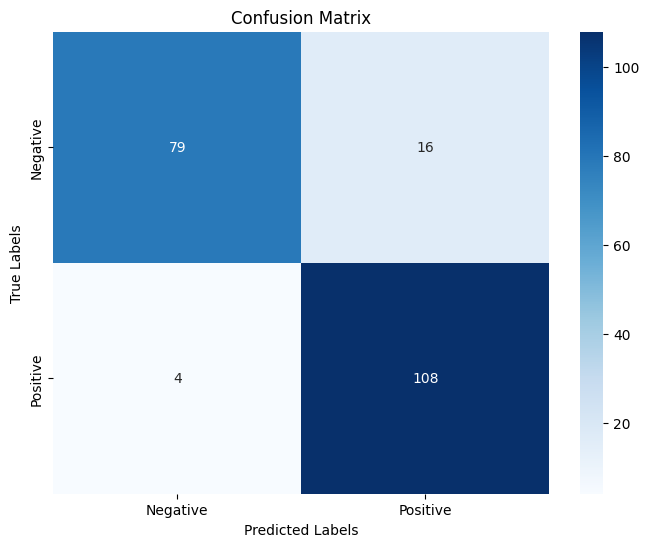

In [140]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
